## Introduction to Image Processing with Python
### Image Processing (RM1-VIS)
### University of Southern Denmark

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage

In [4]:
def plotImage(image, title):
    if(len(image.shape) == 2):
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

#### Histogram Equalization

In [5]:
def plot_histogram(greyvalues, numberBits = 8, normed = False):
    valueRange = 2**numberBits  
    
    #plot histogram        
    fig, ax1 = plt.subplots()   
    
    if (normed):
        ax1.set_title("normed histogram")
    else:
        ax1.set_title("histogram")
    
    index = np.arange(valueRange)
    
    if (normed):
        ax1.bar(index, greyvalues  / float(np.sum(greyvalues)), 0.35, alpha=0.4, color='b')
    else:
        ax1.bar(index, greyvalues, 1, alpha=0.4, color='b')
    ax1.set_ylabel('count', color='b')
    ax1.set_xlabel('pixel intensities')
    ax1.set_xlim((0,valueRange))    
    for tl in ax1.get_yticklabels():
        tl.set_color('b')
        
    #plot cdf
    cdf = np.cumsum(greyvalues)
    ax2 = ax1.twinx()    
    if (normed):
        ax2.plot(index, cdf / float(np.sum(greyvalues)), color = 'r') 
        ax2.set_ylim((0,1.1))
    else:
        ax2.plot(index, cdf, color = 'r')     
    ax2.set_ylabel('cdf', color = 'r')
    ax2.set_xlim((0,valueRange))
    for tl in ax2.get_yticklabels():
        tl.set_color('r')

    plt.show()    

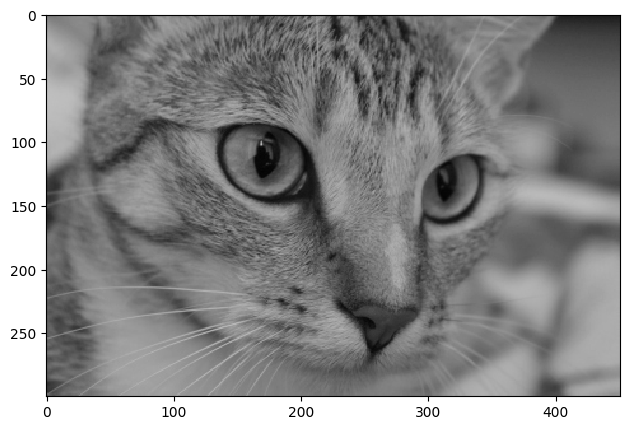

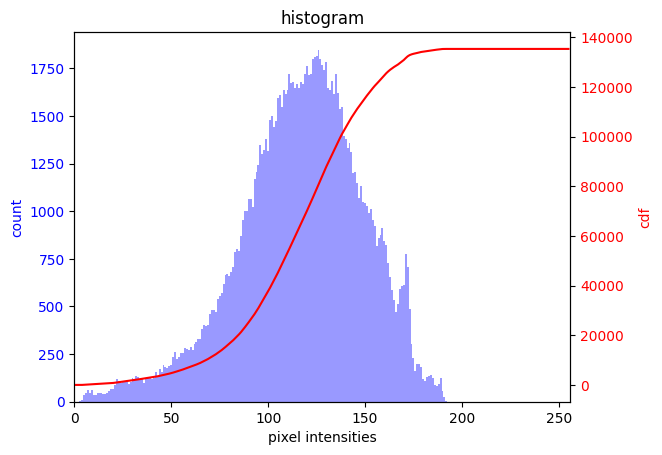

In [6]:
image = skimage.data.cat()
imGray = (skimage.color.rgb2gray(image) * 255.0).astype(np.uint8)
skimage.io.imshow(imGray)

bins, bins_c = skimage.exposure.histogram(imGray)
histogram = np.zeros(256)
np.put(histogram, bins_c, bins)

plot_histogram(histogram)

In [7]:
# implement histogram equalization
def histeq(image):

    return image

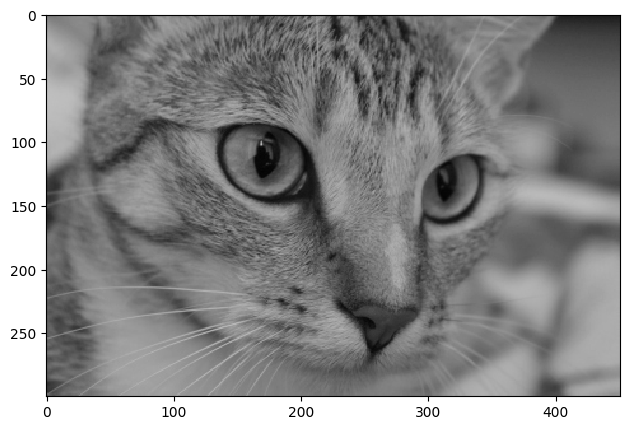

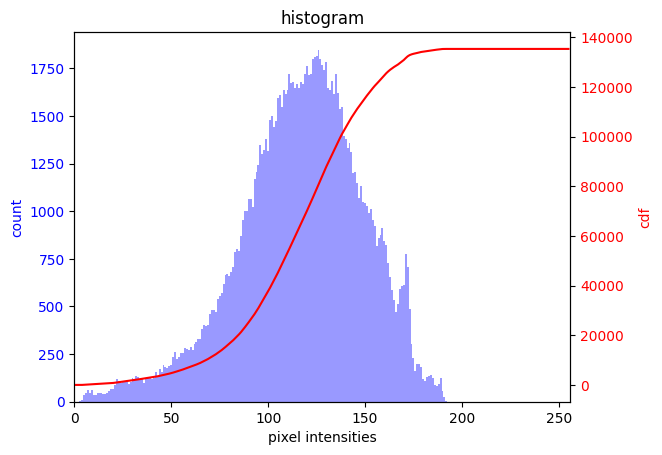

In [8]:
imEq = histeq(imGray)

skimage.io.imshow(imEq)

bins, bins_c = skimage.exposure.histogram(imEq)
histogram = np.zeros(256)
np.put(histogram, bins_c, bins)

plot_histogram(histogram)

#### Spatial Filtering

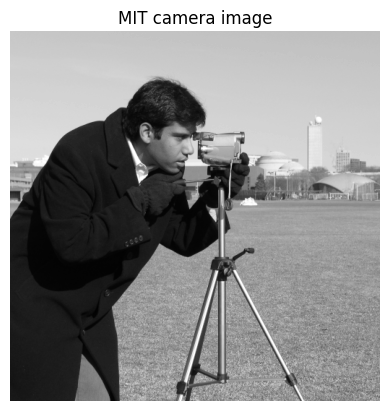

value range: 0 - 255


In [9]:
image = skimage.data.camera()

plotImage(image, "MIT camera image")

print("value range: {} - {}".format(np.min(image), np.max(image)))
  

To perform any spatial filtering, we need to implement the convolution operator. The function conv() takes an image and the filter kernel and returns the output image.

In [10]:
# Convolution function. Iterates over all input pixels and all kernel values. Divides the sums by constant.
def conv(image, filter, constant=1):

    return image

Let us filter the image with a average/box filter. We can let the kernel size n be an argument to the function.

In [11]:
def averaging_kernel(n):

    return kernel

In [12]:
kernel = averaging_kernel(5)
imFiltered = conv(image, kernel, np.sum(kernel))

plotImage(imFiltered, "average filtered")
print("value range: {} - {}".format(np.min(imFiltered), np.max(imFiltered)))


NameError: name 'kernel' is not defined

Gaussian kernels are very popular. The values can be computed from the Gauss pdf formula. Integer valued kernels should perform best.

In [ ]:
def gauss_kernel(n):

    return kernel

In [ ]:
kernel = gauss_kernel(5)
imFiltered = conv(image, kernel)/np.sum(kernel)

plotImage(imFiltered, "Gauss filtered")
print("value range: {} - {}".format(np.min(imFiltered), np.max(imFiltered)))


The Sobel kernel pair is used to estimate the image gradient (vector of derivatives in x and y directions). Kernel coefficient are readily found in literature.

In [ ]:
# The 3x3 Sobel kernels unnormalized
def sobel_kernels():

    return Gx, Gy

In [ ]:
Gx, Gy = sobel_kernels()
Ix = conv(image, Gx)
Iy = conv(image, Gy)

gradMag = np.sqrt(Ix*Ix + Iy*Iy)
gradMagApprox = np.abs(Ix)+np.abs(Iy)

plotImage(gradMag, "Gradient Magnitude")
print("value range: {} - {}".format(np.min(gradMag), np.max(gradMag)))


The Laplacian kernel estimates the sum of second derivatives. We can use it to sharpen the cell image.

In [ ]:
# The 3x3 Laplacian kernel (unnormalized)
def laplacian_kernel():

    
    return kernel

In [ ]:
image = skimage.data.cell()
LI = conv(image, laplacian_kernel())

imSharpened = image + 0.1*LI

plotImage(imSharpened, "Sharpened Image")
print("value range: {} - {}".format(np.min(imSharpened), np.max(imSharpened)))

#### Speeding up filtering ops (optional)

You might have noticed that the filtering operations can be quite compute intensive. The following strategies can be implemented to speed up Gauss filtering:
* 1D kernels
* integer only arithmetic
* loop unrolling / reordering
* vectorizing operations
* multithreading
* GPU implementation
* frequency domain filtering
* approximate Gauss filtering

Experiment with these strategies to optimize the Gauss filter.